In [1]:
%run model.ipynb
%run data.ipynb

Using TensorFlow backend.
D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
D:\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
data.ipynb:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  {
data.ipynb:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

0.6387758116196264


Text(0, 0.5, 'Measured')

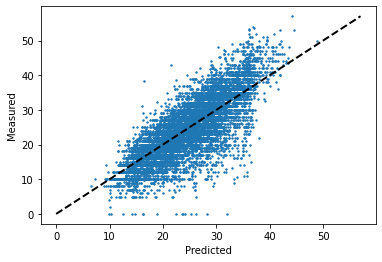

In [4]:
predict = xgbr.predict(X_test)
print(xgbr.score(X_test,y_test))
plt.scatter(predict,y_test,s=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Measured')

In [5]:
# The mean squared error
from math import sqrt

print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, predict)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, predict))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, predict))

Root mean squared error: 5.30
Mean absolute error: 4.01
R-squared: 0.64


In [6]:
predict = xgbr.predict(test_without_ID)
val = pd.DataFrame({'預測乳量':predict})
val[val['預測乳量'] < 0] = 0

x = test.join(val)
x_group = x.groupby(['ID']).mean()
x_index = list(range(0,x_group.shape[0]))
x_group.index

Int64Index([  480,   742,   743,   744,   745,   793,   794,   800,   801,
              802,
            ...
            37476, 37477, 37478, 37479, 37480, 37481, 37482, 37483, 37484,
            37485],
           dtype='int64', name='ID', length=4263)

Text(0, 0.5, 'predict value')

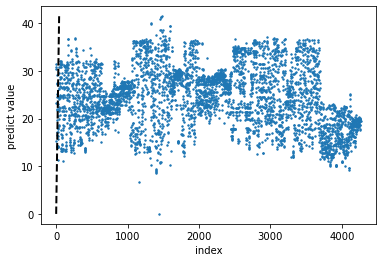

In [7]:
plt.scatter(x_index,x_group['預測乳量'].values,s=2)
#plt.plot(predict_y, predict_y, 'ro')
plt.plot([x_group['預測乳量'].values.min(), x_group['預測乳量'].values.max()], 
         [x_group['預測乳量'].values.min(),x_group['預測乳量'].values.max()], 'k--', lw=2)
plt.xlabel('index')
plt.ylabel('predict value')

In [8]:
for index in range(x_group.shape[0]):
    submission.loc[index, ['1']] = x_group['預測乳量'].values[index]
submission

,ID,1
0,480,15.275928
1,742,30.708057
2,743,31.383495
3,744,30.401293
4,745,23.354958
...,...,...
4258,37481,19.981680
4259,37482,19.695892
4260,37483,19.981680
4261,37484,19.747641


In [9]:
submission.columns = ['ID','預測乳量']
submission.to_csv('resultxgb.csv',index = False)